In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: ylabel='Frequency'>

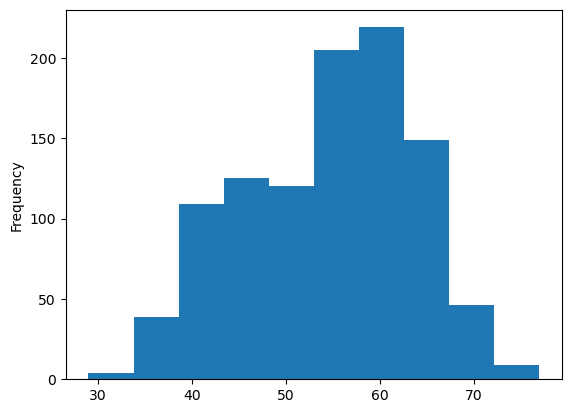

In [6]:
df['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

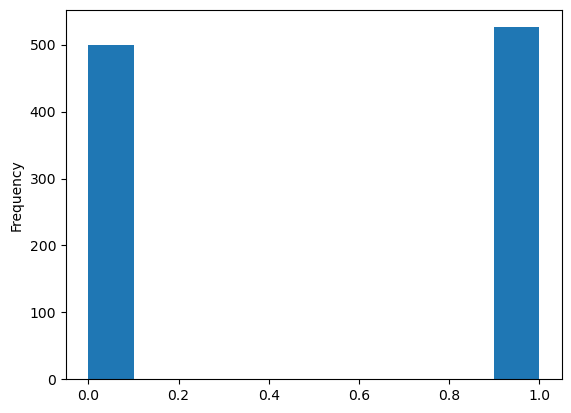

In [7]:
df['target'].plot(kind='hist')

<Axes: ylabel='Frequency'>

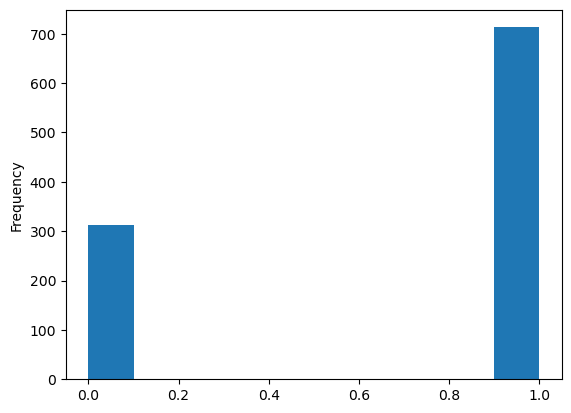

In [8]:
df['sex'].plot(kind='hist')

<Axes: >

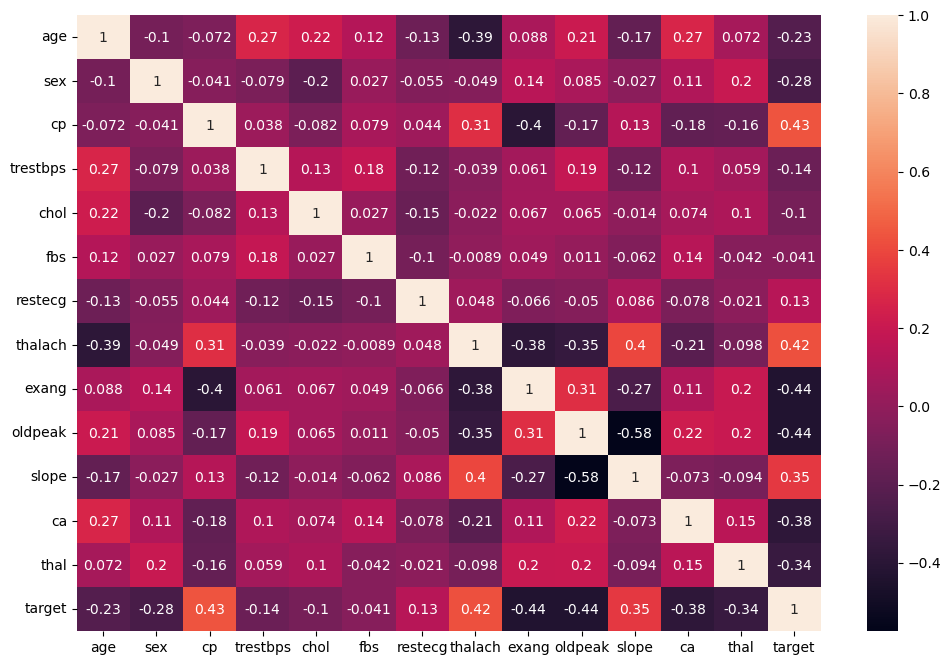

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'gender based target')

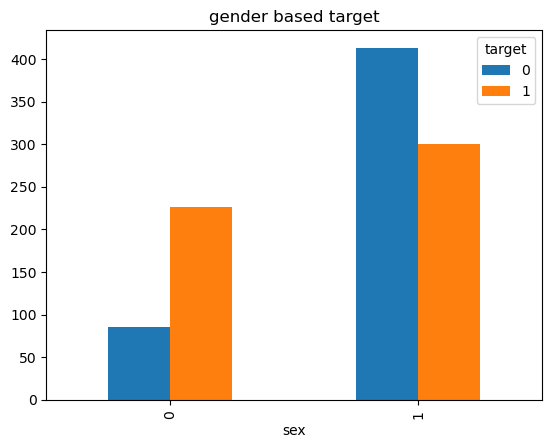

In [10]:
crosstap_gender = pd.crosstab(df['sex'],df['target'])

crosstap_gender.plot(kind='bar')
plt.title('gender based target')

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split

from sklearn.metrics  import confusion_matrix , classification_report

In [211]:
x = df.drop('target',axis=1)
y = df['target']

scaler = StandardScaler()

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.1,random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [213]:
class ModelPipeline:

    def __init__(self, model):
        self.model = model

    def train(self, X_train, y_train):
        return self.model.fit(X_train, y_train)

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        
        model_matrix = confusion_matrix(y_test, y_pred)
        model_report = classification_report(y_test,y_pred)
        
        return model_matrix, model_report

In [215]:
models = [SVC(),RandomForestClassifier(),KNeighborsClassifier(),LogisticRegression(max_iter=200)]

for i,classifier in enumerate(models): 
    model = ModelPipeline(classifier)

    model.train(X_train,y_train)

    model_matrix , report = model.evaluate(X_test,y_test)

    
    print('<<<<<<<<<<<<<',classifier.__class__.__name__,'>>>>>>>>>>>>>>>>>>>>>>>>>>')
    print('matrix is equal to : ','\n',model_matrix,'\n')
    print('report is equal to ','\n',report,'\n')


    print('\n' , '________________________________________________')




<<<<<<<<<<<<< SVC >>>>>>>>>>>>>>>>>>>>>>>>>>
matrix is equal to :  
 [[50  8]
 [ 2 43]] 

report is equal to  
               precision    recall  f1-score   support

           0       0.96      0.86      0.91        58
           1       0.84      0.96      0.90        45

    accuracy                           0.90       103
   macro avg       0.90      0.91      0.90       103
weighted avg       0.91      0.90      0.90       103
 


 ________________________________________________
<<<<<<<<<<<<< RandomForestClassifier >>>>>>>>>>>>>>>>>>>>>>>>>>
matrix is equal to :  
 [[58  0]
 [ 3 42]] 

report is equal to  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103
 


 ______________________________________________

In [217]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [219]:
forest_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'], 
    'max_depth' : [10,20,30,50,100],
    'max_features' : ['sqrt' ,'log2', None]
}
forest_search = GridSearchCV(estimator=RandomForestClassifier(),
                             param_grid=forest_grid,
                             scoring='accuracy',
                            verbose=0)

forest_search.fit(X = X_train,y = y_train)

print('best params = ','\n',forest_search.best_params_,'\n')
print('best score = ','\n',forest_search.best_score_)

best params =  
 {'criterion': 'log_loss', 'max_depth': 30, 'max_features': 'sqrt'} 

best score =  
 1.0


In [229]:
best_forest = RandomForestClassifier(**forest_search.best_params_)

best_forest.fit(X_train,y_train)

y_predicted = best_forest.predict(X_test)

print('matrix = ','\n',confusion_matrix(y_true=y_test,y_pred=y_predicted),'\n')
print('matrix = ','\n',classification_report(y_true=y_test,y_pred=y_predicted))

matrix =  
 [[58  0]
 [ 3 42]] 

matrix =  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103

